In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
from sklearn import datasets

iris = datasets.load_iris()

# Convert to a DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Filter for binary classification 'versicolor' vs 'virginica' ['setosa' 'versicolor' 'virginica']
X = iris_df[iris_df['species'].isin([1, 2])].copy()

# Relabel the target column (optional: make species binary 0 and 1)
X['species'] = X['species'].map({1: 0, 2: 1})

#to array
X = X.values

# Print the filtered dataset
X.shape # (100, 5)


(100, 5)

In [2]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train = X_train[:, -1].reshape(-1, 1).T  # n features, m examples
y_test = X_test[:, -1].reshape(-1, 1).T
X_train = X_train[:, :-1].T
X_test = X_test[:, :-1].T

print(X_train.shape) # (4, 80)
print(X_test.shape)  # (4, 20)
print(y_train.shape) # (1,80)
print(y_test.shape)  # (1,80)

(4, 80)
(4, 20)
(1, 80)
(1, 20)


In [3]:
#Logistic Regression
import sys
import os
sys.path.append(os.path.abspath(".."))
from models.LogisticRegression import LogisticRegressionBinaryClassifier

lr_model = LogisticRegressionBinaryClassifier(n_inputs=X_train.shape[0]) 
lr_model.fit(X_train, y_train, learning_rate=0.01, n_iters=10000)
predictions = lr_model.predict(X_test)

accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy}')

Cost after iteration 0: 0.6860396579025152
Cost after iteration 10: 0.6790533116018704
Cost after iteration 20: 0.6746360373734954
Cost after iteration 30: 0.6703037827690336
Cost after iteration 40: 0.6660208214983522
Cost after iteration 50: 0.6617860858077841
Cost after iteration 60: 0.657599010924208
Cost after iteration 70: 0.6534590417222104
Cost after iteration 80: 0.6493656258914973
Cost after iteration 90: 0.645318214029035
Cost after iteration 100: 0.6413162598064462
Cost after iteration 110: 0.6373592201283421
Cost after iteration 120: 0.6334465552823219
Cost after iteration 130: 0.6295777290810041
Cost after iteration 140: 0.6257522089962659
Cost after iteration 150: 0.6219694662858446
Cost after iteration 160: 0.6182289761124651
Cost after iteration 170: 0.6145302176556563
Cost after iteration 180: 0.6108726742164303
Cost after iteration 190: 0.6072558333149999
Cost after iteration 200: 0.6036791867817111
Cost after iteration 210: 0.6001422308413796
Cost after iteration 22

Cost after iteration 0: 0.8027466146248332
Cost after iteration 10: 0.8008222202030262
Cost after iteration 20: 0.7989268163631293
Cost after iteration 30: 0.797060083413228
Cost after iteration 40: 0.7952217016400674
Cost after iteration 50: 0.7934113514251995
Cost after iteration 60: 0.7916287133585453
Cost after iteration 70: 0.7898734683493459
Cost after iteration 80: 0.7881452977344559
Cost after iteration 90: 0.7864438833839605
Cost after iteration 100: 0.7847689078040823
Cost after iteration 110: 0.7831200542373611
Cost after iteration 120: 0.7814970067600896
Cost after iteration 130: 0.7798994503769894
Cost after iteration 140: 0.7783270711131198
Cost after iteration 150: 0.7767795561030146
Cost after iteration 160: 0.7752565936770428
Cost after iteration 170: 0.7737578734449966
Cost after iteration 180: 0.772283086376911
Cost after iteration 190: 0.7708319248811238
Cost after iteration 200: 0.7694040828795856
Cost after iteration 210: 0.7679992558804365
Cost after iteration 22

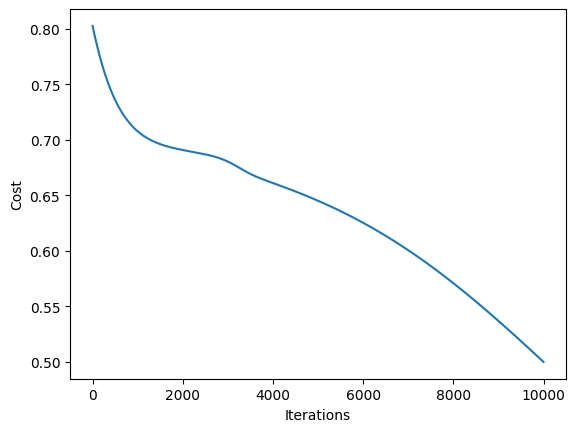

In [4]:
from models.FNN1Layer import FNN1LayerBinaryClassifier
# Train the model
fnn1_model = FNN1LayerBinaryClassifier(input_dim=X_train.shape[0], nunits=3, dropout=None)
costs = fnn1_model.fit(X_train, y_train, learning_rate=0.001, n_iters=10000)
predictions = fnn1_model.predict(X_test)

plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')

accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy}')

In [5]:
from models.FNN import FNNBinaryClassifier

fnn_model = FNNBinaryClassifier(X_train.shape[0], [2], ["relu"], lamdb_reg=0.001)
parameters, costs = fnn_model.fit_mini_batch(X_train, y_train, optimizer="adam", learning_rate=0.01, num_epochs=10000, batch_size=128)
predictions = fnn_model.predict(X_test)

plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')

accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy}')

3
2


AssertionError: 